Na podstawie danych z pliku `Dane meteo.csv`, stwórz wykres, który pokaże, jaka była średnia dobowa wilgotność względna w Warszawie w roku 2020.

Wykres powinien spełniać następujące wymagania:
1. Oś x powinna być podpisana miesiącami,
2. Zarówno oś x, jak i oś y powinny mieć odpowiednie opisy,
3. Wykres powinien zawierać tytuł,
4. Wykres powinie zawierać legendę,
5. Linia wykresu powinna być czerwona, ciągła.

In [61]:
import os
# os: operating system pozwala wykonywać operacje za które jest odpowiedzialny system operacyjny (wyświetlanie zawartości folderów, usuwanie plików, tworzenie katalogów itp.)

import pandas as pd
import matplotlib.pyplot as plt

In [62]:
 df = pd.read_csv(os.path.join("..", "01_Dane do wykresów", "Dane meteo.csv"), sep=";")

In [63]:
df.head()

,Kod stacji,Nazwa stacji,Rok,Miesiąc,Dzień,Średnia dobowa temperatura,Średnia dobowa wilgotność względna,Średnia dobowa prędkość wiatru [m/s],Średnie dobowe zachmurzenie ogólne [oktanty]
0,252200150,WARSZAWA-BIELANY,2020,1,1,2.4,89.5,5.0,8.0
1,252200150,WARSZAWA-BIELANY,2020,1,2,1.3,77.5,3.3,7.0
2,252200150,WARSZAWA-BIELANY,2020,1,3,2.3,75.3,3.7,5.3
3,252200150,WARSZAWA-BIELANY,2020,1,4,3.3,84.0,5.0,6.7
4,252200150,WARSZAWA-BIELANY,2020,1,5,0.7,79.5,3.3,0.7


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Kod stacji                                    366 non-null    int64  
 1   Nazwa stacji                                  366 non-null    object 
 2   Rok                                           366 non-null    int64  
 3   Miesiąc                                       366 non-null    int64  
 4   Dzień                                         366 non-null    int64  
 5   Średnia dobowa temperatura                    366 non-null    float64
 6   Średnia dobowa wilgotność względna            366 non-null    float64
 7   Średnia dobowa prędkość wiatru [m/s]          366 non-null    float64
 8   Średnie dobowe zachmurzenie ogólne [oktanty]  366 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 25.9+ KB


In [65]:
df["Nazwa stacji"].unique()

array(['WARSZAWA-BIELANY'], dtype=object)

In [66]:
df["Rok"].unique()

array([2020])

In [67]:
monthly_avg = df.groupby("Miesiąc")["Średnia dobowa wilgotność względna"].mean()
monthly_avg

Miesiąc
1     84.838710
2     78.124138
3     61.983871
4     50.206667
5     65.329032
6     75.943333
7     68.054839
8     69.087097
9     77.610000
10    86.732258
11    88.046667
12    87.896774
Name: Średnia dobowa wilgotność względna, dtype: float64

In [68]:
#    pd.DataFrame(monthly_avg).iloc[:, 0]

months = ['Styczeń', 'Luty', 'Marzec', 'Kwiecień', 'Maj', 'Czerwiec', 'Lipiec', 'Sierpień', 'Wrzesień', 'Październik', 'Listopad', 'Grudzień' ]

<Axes: xlabel='Miesiąc'>

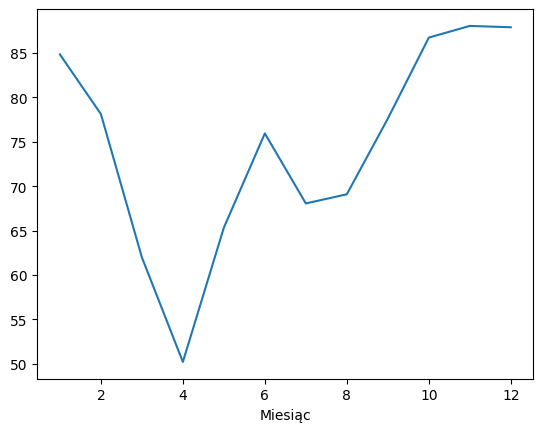

In [69]:
monthly_avg.plot()    # pandas ma w sobie matplotlib więc można od razu wyrysować wykres

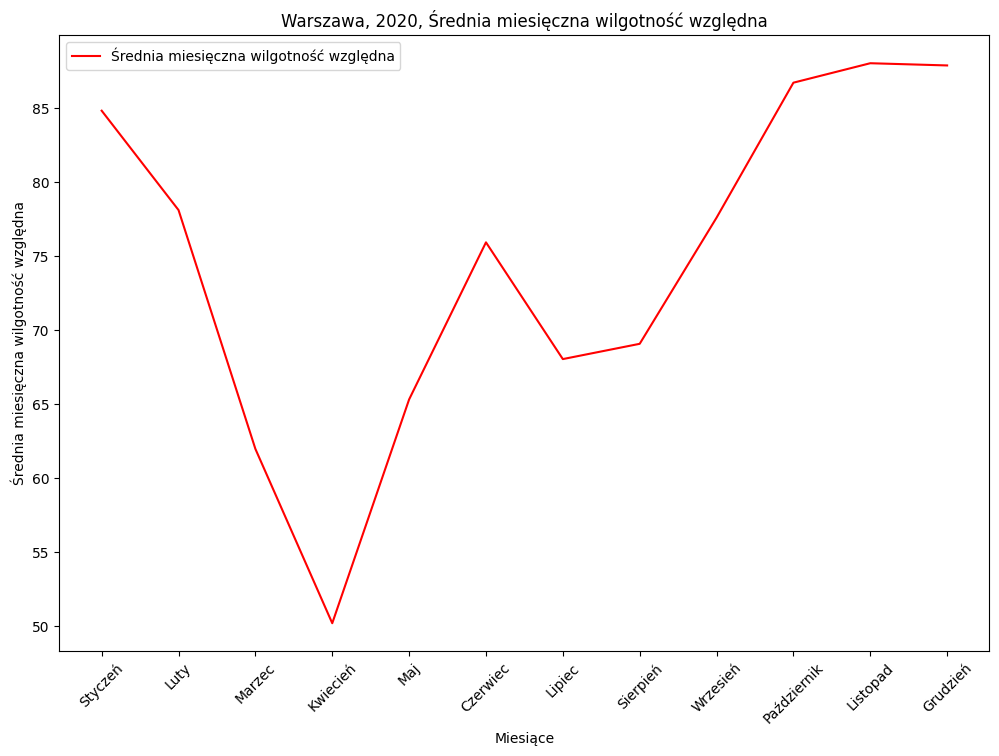

In [79]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(months, monthly_avg, color='red', linestyle='-')
ax.set_xlabel("Miesiące")    # ustawia napis osi na osi x
ax.set_ylabel("Średnia miesięczna wilgotność względna")
ax.set_title("Warszawa, 2020, Średnia miesięczna wilgotność względna")    # tytuł całego wykresu
ax.legend(["Średnia miesięczna wilgotność względna"])

plt.xticks(rotation=45)    # przechylenie nazw miesięcy na osi x o 45 stopni

plt.show()    # zamyka canvas